In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier,BernoulliRBM, MLPRegressor

In [ ]:
data = pd.read_csv('data_cardiovascular_risk.csv')

In [ ]:
print(data["TenYearCHD"].value_counts())

TenYearCHD
0    2879
1     511
Name: count, dtype: int64


In [ ]:
media_educacion = (round(data['education'].mean(skipna = True)))
data['education'] = data['education'].fillna(0)

media_cigsPerDay = (round(data['cigsPerDay'].mean(skipna = True)))
data['cigsPerDay'] = data['cigsPerDay'].fillna(0)

media_BPMeds = (round(data['BPMeds'].mean(skipna = True)))
data['BPMeds'] = data['BPMeds'].fillna(0)

media_totChol = (round(data['totChol'].mean(skipna = True)))
data['totChol'] = data['totChol'].fillna(0)

media_BMI = (data['BMI'].mean(skipna = True))
data['BMI'] = data['BMI'].fillna(0)

media_heartRate = (round(data['heartRate'].mean(skipna = True)))
data['heartRate'] = data['heartRate'].fillna(0)

media_glucose = (round(data['glucose'].mean(skipna = True)))
data['glucose'] = data['glucose'].fillna(0)


In [ ]:
data['is_smoking'] = data['is_smoking'].eq("YES").mul(1)
data['sex'] = data['sex'].eq("M").mul(1)
#data = data.sort_values(by = ["TenYearCHD"], ascending=False)
data

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,0.00,90.0,80.0,1
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,1,0,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [ ]:
    y = data['TenYearCHD']
    data_eda = data.drop(['TenYearCHD', 'id', 'BPMeds', 'prevalentStroke', 'prevalentHyp',	'diabetes', 'sex', 'is_smoking'], axis=1)
    #X = data.drop(['TenYearCHD', 'id', 'BPMeds', 'prevalentStroke', 'prevalentHyp',	'diabetes', 'sex', 'is_smoking'], axis=1)
    X = data.drop(['TenYearCHD', 'id'], axis=1)
    X


,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,0.00,90.0,80.0
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0
3386,46,1.0,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0
3387,44,3.0,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0
3388,60,1.0,1,0,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0


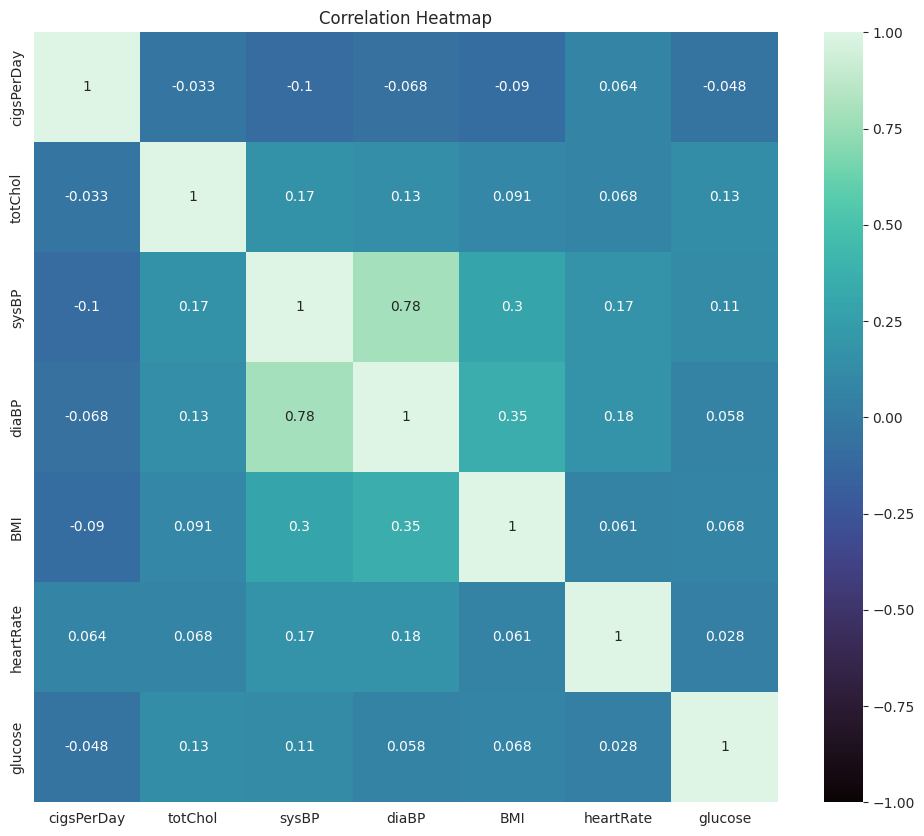

In [ ]:
campos_numericos = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
eda_df = data_eda.loc[:, campos_numericos].copy()
corr = eda_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Heatmap")
plt.show()

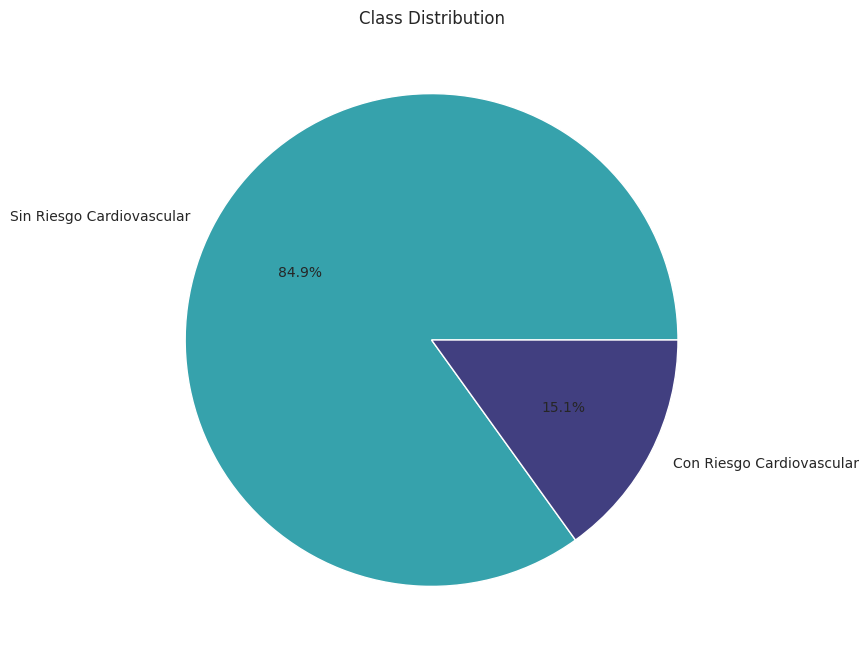

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(data['TenYearCHD'].value_counts(), labels=["Sin Riesgo Cardiovascular", "Con Riesgo Cardiovascular"], autopct='%.1f%%', colors=['#36a2ac', '#413f80'])
plt.title("Class Distribution")
plt.show()

In [ ]:
scaler = RobustScaler()

X = scaler.fit_transform(X)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.071429,0.0,0.0,1.0,0.15,0.0,0.0,0.0,0.0,-0.220339,0.722222,0.193548,-5.047761,1.000000,0.176471
1,-0.928571,1.0,1.0,0.0,0.00,0.0,0.0,1.0,0.0,-0.372881,1.462963,1.032258,0.876617,-0.200000,-0.117647
2,-0.214286,-0.5,0.0,1.0,0.50,0.0,0.0,0.0,0.0,0.271186,-0.462963,-0.709677,-0.998010,0.866667,1.000000
3,0.071429,-0.5,1.0,1.0,1.00,0.0,0.0,1.0,0.0,-0.016949,1.092593,0.387097,0.576119,-0.466667,1.000000
4,1.071429,-0.5,0.0,1.0,1.50,0.0,0.0,0.0,0.0,0.118644,0.296296,0.193548,0.209950,-0.333333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,0.785714,-0.5,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.457627,-0.185185,-0.193548,0.779104,-0.333333,1.529412
3386,-0.214286,-0.5,0.0,0.0,0.00,0.0,0.0,0.0,0.0,-0.593220,-0.981481,-1.677419,-0.677612,0.333333,0.411765
3387,-0.357143,0.5,1.0,1.0,0.15,0.0,0.0,1.0,0.0,2.000000,1.314815,2.387097,0.707463,-0.133333,-0.294118
3388,0.785714,-0.5,1.0,0.0,0.00,0.0,0.0,1.0,0.0,-0.728814,1.425926,1.483871,-0.468657,0.333333,0.470588


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [ ]:
nn_model = MLPClassifier()
nn_model.fit(X_train, y_train)

print("Neural Network Accuracy: {:.2f}%".format(nn_model.score(X_test, y_test) * 100))
result = nn_model.predict(X_train)
result


Neural Network Accuracy: 85.05%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([0, 0, 0, ..., 1, 0, 0])